<center> <b> Submitted by Group 3 </b>
<br>Aman Jain (aj644)
<br>Murali TS (mt788)
<br>Vidhisha Nakhwa (vn83)
<br>Sukrut Nigwekar (sn639)</center>

## Q1 

"Make sure that every team member has read the project description before starting this assignment"- <b>Done</b>

## Q2

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import scipy.stats as st
import pandas as pd 
from numpy import nan
import scipy.stats as sc
import scipy.stats as st

In [61]:
data = pd.read_csv("TonerItDown.csv")
print(np.shape(data))
data.head(5)

(7172, 7)


,Request no,Day,Time of day,Request location,Initial diagnose time,Needs Replacement?,On-site repair time
0,1,1,0.239113,BC_10,12.633020,NaN,22.125290
1,2,1,1.139550,BC_1,19.486501,yes,NaN
2,3,1,1.309831,BC_5,16.161550,NaN,7.349665
3,4,1,1.458689,BC_4,17.991248,NaN,31.835509
4,5,1,1.754376,BC_5,16.736394,NaN,10.733933


In [62]:
# function to calculate 95% CI of an array. 
def CI_95(X):
    mean = np.mean(X)
    LB = np.mean(X) - 1.96*np.std(X,ddof = 1)/np.sqrt(np.size(X))
    UB = np.mean(X) + 1.96*np.std(X,ddof = 1)/np.sqrt(np.size(X))
    return mean, LB, UB

In [63]:
print(np.shape(data[data["Needs Replacement?"] == "yes"]))
print(np.shape(data[np.isnan(data["On-site repair time"])]))

(1294, 7)
(1294, 7)


<br>As can be seen above, all those requests that marks need replacements have no On-site repair time available. <br>Hence we can assume that whereever On-site rapair time is nan, there we need off-site repair. 
<br>This also assumes that every offsite replacement needs repair. 
<br>We are not considering impact of hour of request on on site/off site repair decision. 
<br>There might be cases where requests are place at office closure time hence offsite rapair was done, even though on site repair would have been possible. 

In [64]:
Offsite_repair = np.isnan(data["On-site repair time"])*1
mean, LB, UB = CI_95(Offsite_repair)
print("fraction of customer requests that require off-site repair is ", mean)
print("95% CI range is ", LB,UB)

fraction of customer requests that require off-site repair is  0.1804238706079197
95% CI range is  0.17152350476732442 0.18932423644851498


<br> <b> fraction of customer requests that require off-site repair is  0.18
<br> 95% CI range is  (0.17152, 0.1893) </b>

## Q3

In [65]:
#removing nan
Onsite_repair_time = data[(data["On-site repair time"] >= 0)]["On-site repair time"]
Onsite_repair_time

0       22.125290
2        7.349665
3       31.835509
4       10.733933
5       17.075570
6       35.068595
7       37.308511
8       39.839388
9       33.003310
12      60.148816
13       8.966096
14      14.912936
15      15.048912
16      20.259774
17      20.684003
18      20.445788
19      27.010334
21      24.119693
22      26.962708
23      43.140592
25      31.767042
26      33.365783
27      33.361201
28      28.286649
29       6.430361
30      11.789026
31       6.543758
32      16.149842
33      39.471514
34      35.390860
          ...    
7142    48.139317
7143    26.597868
7144     7.611165
7145    11.502652
7146    23.033082
7147    22.864028
7148    22.489458
7149    26.950339
7150    33.695999
7151    43.063678
7152    32.248519
7153    41.778819
7154    20.293617
7155    44.038762
7156    14.096924
7157     8.870955
7158    24.957760
7159    27.968556
7160    19.889866
7161     3.440138
7162     7.941069
7163     8.403874
7164    42.663299
7165    32.908809
7166    35

(array([ 454., 1189., 1407., 1183.,  907.,  426.,  213.,   76.,   15.,
           8.]),
 array([ 0.16205745,  7.7866848 , 15.41131216, 23.03593951, 30.66056686,
        38.28519422, 45.90982157, 53.53444892, 61.15907627, 68.78370363,
        76.40833098]),
 <a list of 10 Patch objects>)

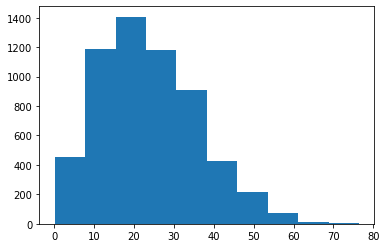

In [66]:
plt.hist(Onsite_repair_time)

<b>Prima facie from the histogram following distributions looks worth exploring: Normal, Beta, Raleigh, Gamma</b>

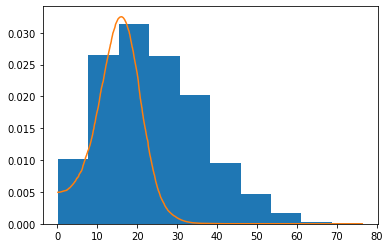

In [67]:
## Norm

loc,scale = sc.norm.fit(Onsite_repair_time)
x = np.sort(Onsite_repair_time)
plt.hist(x,density = 1)
u = np.arange(0,80,80/np.size(x))
fx = sc.norm.pdf(u,loc,scale)
plt.plot(x, fx);

KstestResult(statistic=0.04893708722810736, pvalue=1.1858345823398563e-12)

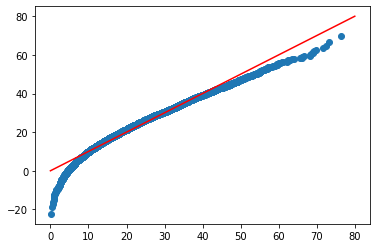

In [68]:
##Quantiles of distribution
n = np.size(x)
u = (range(1,n+1) - 0.5*np.ones(n))/n
Dis = sc.norm.ppf(u,loc,scale)
plt.scatter(x,Dis)
plt.plot([0,80],[0,80],c='r')

sc.kstest(x,'norm',args = (loc,scale)) # if pval > 0.05 fail to reject null hypothesis

2.617986716241127 7.461801823981 -0.46574608609621293 93.45180392115793


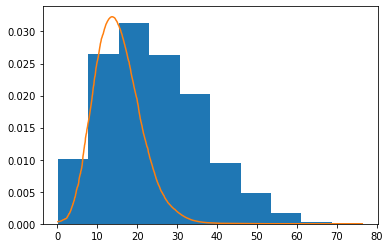

In [69]:
## Beta

a,b,loc,scale = sc.beta.fit(Onsite_repair_time)
print(a,b,loc,scale)

x = np.sort(Onsite_repair_time)
plt.hist(x,density = 1)
u = np.arange(0,80,80/n)
fx = sc.beta.pdf(u,a,b,loc,scale)
plt.plot(x, fx)

KstestResult(statistic=0.009315652385251283, pvalue=0.687462279791315)

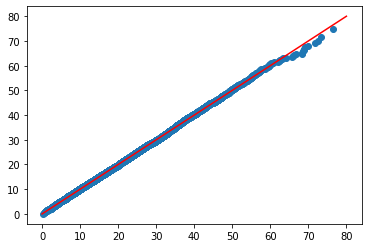

In [70]:
#Quantiles of distribution
u = (range(1,n+1) - 0.5*np.ones(n))/n
Dis = sc.beta.ppf(u,a,b,loc,scale)
plt.scatter(x,Dis)
plt.plot([0,80],[0,80],c='r')

sc.kstest(x,'beta',args = (a,b,loc,scale)) # if pval > 0.05 fail to reject null hypothesis

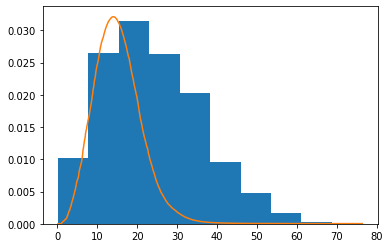

In [71]:
## Raleigh

loc,scale = sc.rayleigh.fit(Onsite_repair_time)

x = np.sort(Onsite_repair_time)
plt.hist(x,density = 1)
u = np.arange(0,80,80/n)
fx = sc.rayleigh.pdf(u,loc,scale)
plt.plot(x, fx);

KstestResult(statistic=0.010357084645583159, pvalue=0.5538395344963649)

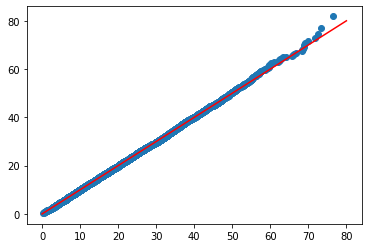

In [72]:
#Quantiles of distribution

u = (range(1,n+1) - 0.5*np.ones(n))/n
Dis = sc.rayleigh.ppf(u,loc,scale)
plt.scatter(x,Dis)
plt.plot([0,80],[0,80],c='r')

sc.kstest(x,'rayleigh',args = (loc,scale)) # if pval > 0.05 fail to reject null hypothesis

5.326346074135864 -5.120337470139379 5.432227543631485


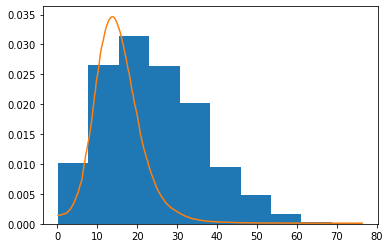

In [73]:
## Gamma

a,loc,scale = sc.gamma.fit(Onsite_repair_time)
print (a,loc,scale)
x = np.sort(Onsite_repair_time)
plt.hist(x,density = 1)
u = np.arange(0,80,80/n)
fx = sc.gamma.pdf(u,a,loc,scale)
plt.plot(x, fx);

KstestResult(statistic=0.02314073447651188, pvalue=0.003690049174504887)

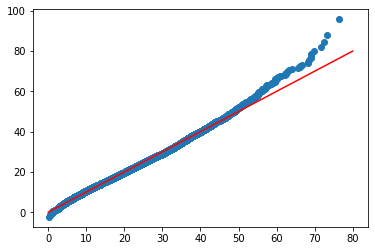

In [74]:
#Quantiles of distribution
u = (range(1,n+1) - 0.5*np.ones(n))/n
Dis = sc.gamma.ppf(u,a,loc,scale)
plt.scatter(x,Dis)
plt.plot([0,80],[0,80],c='r')

sc.kstest(x,'gamma',args = (a,loc,scale)) # if pval > 0.05 fail to reject null hypothesis

<br>From Q-Q plots - Beta,Raleigh and Gamma - all three looks good fit. However, going by p-value of ks test (at 95% level), we will be <b>modelling on-site repair time as Beta Distribution with parameters (a = 2.61, b=7.46, loc = -0.4657, sclae = 93.4518).</b>

<br>For Normal, p-value = 1.1858345823398563e-12
<br><b>For Beta, p-value = 0.687462279791315 </b>
<br>For Raleigh, p-value = 0.5538395344963649  
<br>For Gamma, p-value = 0.003690049174504887

## Q4

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sc

## Answer 4A

Histogram of Initial Diagnosis time. It looks like a normal distribution


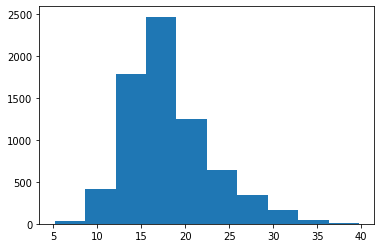

In [76]:
data = pd.read_csv("TonerItDown.csv")
plt.hist(data["Initial diagnose time"])
print("Histogram of Initial Diagnosis time. It looks like a normal distribution")

In [77]:
n = np.size(data["Initial diagnose time"])
loc,scale = sc.norm.fit(data["Initial diagnose time"])
loc,scale
n

7172

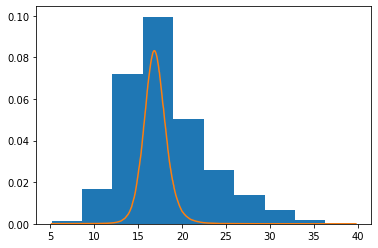

In [78]:
x = np.sort(data["Initial diagnose time"])
plt.hist(x,density = 1)
u = np.arange(0,40,40/n)
fx = sc.norm.pdf(u,loc,scale)
plt.plot(x, fx)

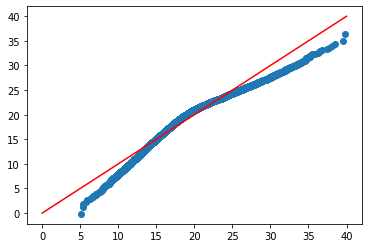

In [79]:
#Quantiles of distribution
u = (range(1,n+1) - 0.5*np.ones(n))/n
Dis = sc.norm.ppf(u,loc,scale)
plt.scatter(x,Dis)
plt.plot([0,40],[0,40],c='r')

In [80]:
sc.kstest(x,'norm',args = (loc,scale)) # pval > 0.05 fail to reject null hypothesis

KstestResult(statistic=0.08676490905571166, pvalue=2.5367175306064073e-47)

<b>The distribution looks like normal, but KS test do not justify this assumption. This might be due to presence of multiple groups in the dataset. We will investigate this in below parts. </b>

## Answer 4B

In [81]:
data["Request location"].unique()

array(['BC_10', 'BC_1', 'BC_5', 'BC_4', 'BC_9', 'BC_6', 'BC_8', 'BC_3',
       'BC_7', 'BC_2'], dtype=object)

In [82]:
businesscenters = ['BC_1','BC_2','BC_3','BC_4','BC_5','BC_6','BC_7','BC_8','BC_9','BC_10']
clean = data[['Time of day', 'Request location', 'Initial diagnose time']]

This is for  BC_1
15.974684218978792


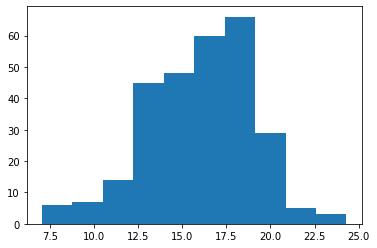

This is for  BC_2
22.18928299375254


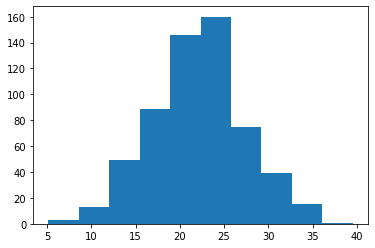

This is for  BC_3
22.021860421525826


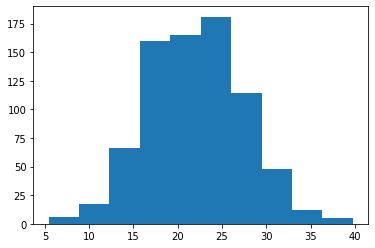

This is for  BC_4
16.180883201904336


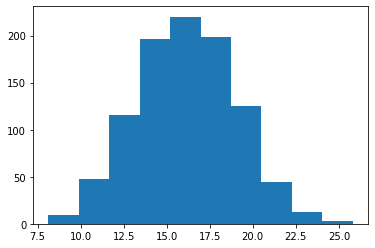

This is for  BC_5
16.19863668737339


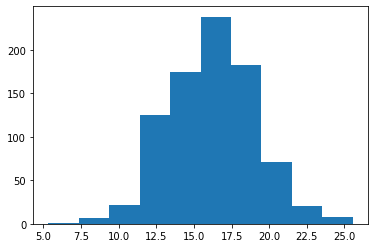

This is for  BC_6
16.151506043576152


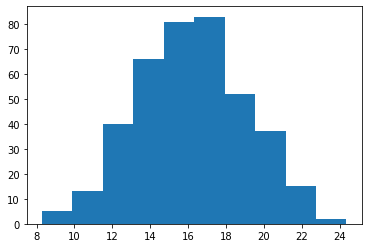

This is for  BC_7
16.01177257942054


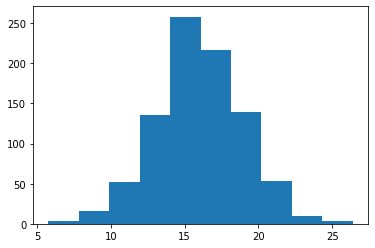

This is for  BC_8
16.269801562621687


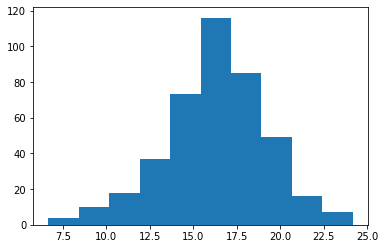

This is for  BC_9
22.235297435301234


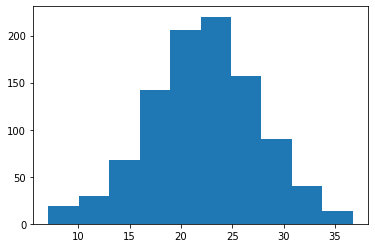

This is for  BC_10
16.10620390963405


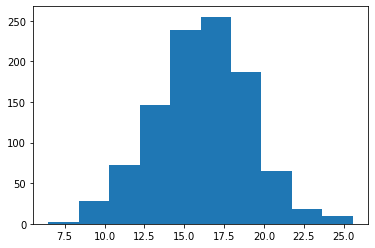

In [83]:
for i in businesscenters:
    data1 = data[data["Request location"] == i]
    print("This is for ",i)
    plt.hist(data1["Initial diagnose time"])
    print(np.mean(data1["Initial diagnose time"]))
    plt.show()

## Answer C

<b>The groups are 1,4,5,6,7,8,10 (with mean in range of 15.96 - 16.20) 
#and 2,3,9 (with mean in range of 22.02-22.18)</b>

We will be doing KS test to see if normal distribution fits each of these groups. 

### For group 1

In [84]:
group1 = ["BC_1","BC_4","BC_5","BC_6","BC_7","BC_8","BC_10"]
group2 = ['BC_2','BC_3','BC_9']

data2 = data[data["Request location"].isin(group1)]
n = np.size(data2["Initial diagnose time"])
loc,scale = sc.norm.fit(data2["Initial diagnose time"])
loc,scale

(16.130224047501244, 2.8916175742876202)

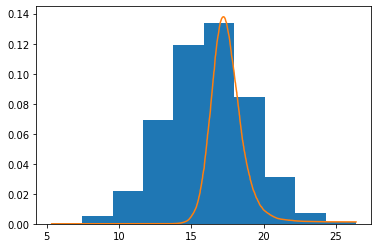

In [85]:
n = np.size(data2["Initial diagnose time"])
x = np.sort(data2["Initial diagnose time"])
plt.hist(x,density = 1)
u = np.arange(0,25,25/n)
fx = sc.norm.pdf(u,loc,scale)
plt.plot(x, fx)

KstestResult(statistic=0.008777624667443806, pvalue=0.8514265185158666)

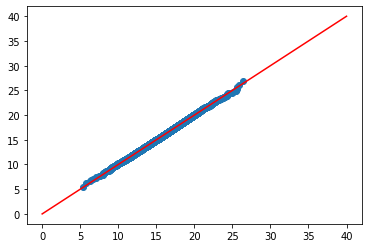

In [86]:
#Quantiles of distribution
u = (range(1,n+1) - 0.5*np.ones(n))/n
Dis = sc.norm.ppf(u,loc,scale)
plt.scatter(x,Dis)
plt.plot([0,40],[0,40],c='r')
sc.kstest(x,'norm',args = (loc,scale)) # pval > 0.05 fail to reject null hypothesis

### For 2nd Group

22.153446895226384 5.34520440992782


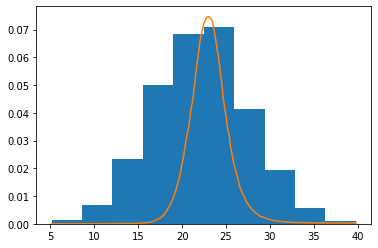

KstestResult(statistic=0.012617014410356675, pvalue=0.8485153586745044)

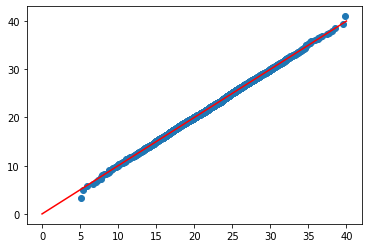

In [87]:
data3 = data[data["Request location"].isin(group2)]
n = np.size(data3["Initial diagnose time"])
loc,scale = sc.norm.fit(data3["Initial diagnose time"])
print(loc,scale)
n = np.size(data3["Initial diagnose time"])
x = np.sort(data3["Initial diagnose time"])
plt.hist(x,density = 1)

u = np.arange(0,40,40/n)
fx = sc.norm.pdf(u,loc,scale)
plt.plot(x, fx)
plt.show()
#Quantiles of distribution
u = (range(1,n+1) - 0.5*np.ones(n))/n
Dis = sc.norm.ppf(u,loc,scale)
plt.scatter(x,Dis)
plt.plot([0,40],[0,40],c='r')

sc.kstest(x,'norm',args = (loc,scale)) # pval > 0.05 fail to reject null hypothesis

<b> As can be seeing from KS test values, normal distribution fits each of these groups individually with p values being around 0.85 for each group. </b>

## Part D

<b>
<br>We will be have 10 sources and 2 distribution classes. 
<br>1st distribution class: Normal distribution with parameters (mean = 16.13, std deviation = 2.891)
<br>for group1 = ["BC_1","BC_4","BC_5","BC_6","BC_7","BC_8","BC_10"]

<br>2nd distribution class: Normal distribution with parameters (mean = 22.15, std deviation = 5.345)
<br>for group2 = ['BC_2','BC_3','BC_9']
    </b>

# Q 5

In [88]:
import pandas as pd
import numpy as np
import scipy.stats as sc
import scipy.stats as st
import matplotlib.pyplot as plt

In [89]:
data = pd.read_csv('TonerItDown.csv', header=0)
data.head(5)

,Request no,Day,Time of day,Request location,Initial diagnose time,Needs Replacement?,On-site repair time
0,1,1,0.239113,BC_10,12.633020,NaN,22.125290
1,2,1,1.139550,BC_1,19.486501,yes,NaN
2,3,1,1.309831,BC_5,16.161550,NaN,7.349665
3,4,1,1.458689,BC_4,17.991248,NaN,31.835509
4,5,1,1.754376,BC_5,16.736394,NaN,10.733933


In [90]:
data['Request location'].unique()

array(['BC_10', 'BC_1', 'BC_5', 'BC_4', 'BC_9', 'BC_6', 'BC_8', 'BC_3',
       'BC_7', 'BC_2'], dtype=object)

In [91]:
data['o_BC_1'] = (data['Request location'] == 'BC_1').astype(int)
data['o_BC_2'] = (data['Request location'] == 'BC_2').astype(int)
data['o_BC_3'] = (data['Request location'] == 'BC_3').astype(int)
data['o_BC_4'] = (data['Request location'] == 'BC_4').astype(int)
data['o_BC_5'] = (data['Request location'] == 'BC_5').astype(int)
data['o_BC_6'] = (data['Request location'] == 'BC_6').astype(int)
data['o_BC_7'] = (data['Request location'] == 'BC_7').astype(int)
data['o_BC_8'] = (data['Request location'] == 'BC_8').astype(int)
data['o_BC_9'] = (data['Request location'] == 'BC_9').astype(int)
data['o_BC_10'] = (data['Request location'] == 'BC_10').astype(int)

In [92]:
def get_conf(x):
    m = len(x)
    avg = np.mean(x)
    LB = avg - st.norm.ppf(0.975)*np.sqrt(np.var(x, ddof=1)/m)
    UB = avg + st.norm.ppf(0.975)*np.sqrt(np.var(x, ddof=1)/m)
    return avg, LB, UB

In [93]:
print("Below are the (Mean, LB, UB) for each Location")
print("BC1", get_conf(data['o_BC_1'].values))
print("BC2", get_conf(data['o_BC_2'].values))
print("BC3", get_conf(data['o_BC_3'].values))
print("BC4", get_conf(data['o_BC_4'].values))
print("BC5", get_conf(data['o_BC_5'].values))
print("BC6", get_conf(data['o_BC_6'].values))
print("BC7", get_conf(data['o_BC_7'].values))
print("BC8", get_conf(data['o_BC_8'].values))
print("BC9", get_conf(data['o_BC_9'].values))
print("BC10", get_conf(data['o_BC_10'].values))

Below are the (Mean, LB, UB) for each Location
BC1 (0.039459007250418295, 0.034953027258082144, 0.043964987242754446)
BC2 (0.0822643614054657, 0.07590486254733364, 0.08862386026359775)
BC3 (0.1079196876742889, 0.10073826403251306, 0.11510111131606475)
BC4 (0.13552704963747908, 0.12760482913582438, 0.14344927013913378)
BC5 (0.11837702175125488, 0.11089991837860799, 0.12585412512390176)
BC6 (0.054935861684327944, 0.04966214442666805, 0.060209578941987835)
BC7 (0.12367540435025097, 0.11605580037328111, 0.13129500832722082)
BC8 (0.057863915225878415, 0.052459870226862756, 0.06326796022489407)
BC9 (0.13747908533184608, 0.12950902949162707, 0.1454491411720651)
BC10 (0.14249860568878975, 0.13440800150611018, 0.15058920987146932)


# Q6

In [94]:
lambda_ = []
for i in range(24):
#i = 0
    df = data.loc[(data['Time of day'] >= i) & (data['Time of day'] < i+1)]
    l = np.mean(df[['Day', 'Time of day']].groupby(['Day']).agg(['count']).values)

    #MLE for a stationary poisson process is the mean across all the observations

    lambda_.append(l) 

In [95]:
lambda_

[1.3529411764705883,
 1.7894736842105263,
 1.9574468085106382,
 3.1052631578947367,
 3.75,
 4.95,
 5.916666666666667,
 6.566666666666666,
 7.083333333333333,
 7.0,
 7.983333333333333,
 8.15,
 8.15,
 7.566666666666666,
 7.783333333333333,
 7.533333333333333,
 6.733333333333333,
 6.316666666666666,
 5.016666666666667,
 4.423728813559322,
 3.533333333333333,
 2.581818181818182,
 1.4772727272727273,
 1.5909090909090908]

(array([0.00703348, 0.00882633, 0.01448069, 0.02606525, 0.03254708,
        0.04054594, 0.05130302, 0.05557827, 0.05888815, 0.0595777 ,
        0.06743865, 0.06757656, 0.06812821, 0.06412878, 0.06578371,
        0.06081891, 0.05406125, 0.05144093, 0.04123549, 0.03351246,
        0.02730645, 0.01668727, 0.00786095, 0.00827468]),
 array([ 0.04797284,  1.05899275,  2.07001266,  3.08103256,  4.09205247,
         5.10307238,  6.11409228,  7.12511219,  8.1361321 ,  9.14715201,
        10.15817191, 11.16919182, 12.18021173, 13.19123163, 14.20225154,
        15.21327145, 16.22429135, 17.23531126, 18.24633117, 19.25735108,
        20.26837098, 21.27939089, 22.2904108 , 23.3014307 , 24.31245061]),
 <a list of 24 Patch objects>)

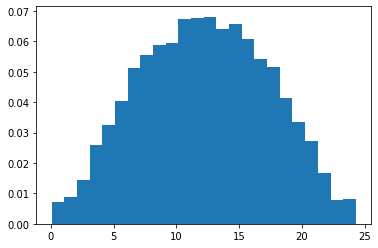

In [96]:
x = np.sort(data['Time of day'].values)
plt.hist(x, density = 100, bins = 24 )

Text(0.5, 0, 'time t')

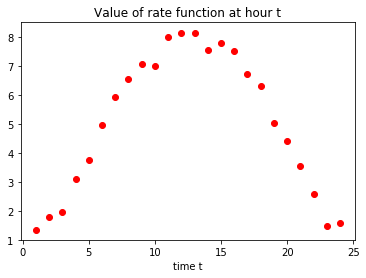

In [97]:
x = range(1,25)
y = lambda_
plt.scatter(x,y, c = 'red')
plt.title('Value of rate function at hour t')
plt.xlabel('time t')

In [98]:
for i in range(24):
    print("Time Period: ",i," - ",i+1, " Has value of rate function: ", lambda_[i])

Time Period:  0  -  1  Has value of rate function:  1.3529411764705883
Time Period:  1  -  2  Has value of rate function:  1.7894736842105263
Time Period:  2  -  3  Has value of rate function:  1.9574468085106382
Time Period:  3  -  4  Has value of rate function:  3.1052631578947367
Time Period:  4  -  5  Has value of rate function:  3.75
Time Period:  5  -  6  Has value of rate function:  4.95
Time Period:  6  -  7  Has value of rate function:  5.916666666666667
Time Period:  7  -  8  Has value of rate function:  6.566666666666666
Time Period:  8  -  9  Has value of rate function:  7.083333333333333
Time Period:  9  -  10  Has value of rate function:  7.0
Time Period:  10  -  11  Has value of rate function:  7.983333333333333
Time Period:  11  -  12  Has value of rate function:  8.15
Time Period:  12  -  13  Has value of rate function:  8.15
Time Period:  13  -  14  Has value of rate function:  7.566666666666666
Time Period:  14  -  15  Has value of rate function:  7.783333333333333
T

## Q7

<br>"Van operators indicate that swapping a broken copier for a working one at the dispatch center can take as little <br>as 10 minutes, or as much as 25 minutes, but usually takes about 15 minutes."

<br>"Van operators indicated this usually takes about 30 minutes, but can take anywhere from 20 minutes to an hour"

<br><b>We will be using triangular distribution for copy swap times at both dispatch center and customer location. As we are given min, max and mode (most usual time) for both process. </b>

<br>For swap time at dispatch center (all in minutes): 
<br>min = 10
<br>most likely = 15
<br>max = 25

<br>For swap time at dispatch center (all in minutes): 
<br>min = 20
<br>most likely = 30
<br>max = 60

In [99]:
swap_time_dispatch = np.random.triangular(10, 15, 25, size=1)  #unit in minutes. 
swap_time_customer = np.random.triangular(20, 30, 60, size=1)  #unit in minutes. 
print("sample dispatch swap time: ",swap_time_dispatch)
print("sample customer swap time: ",swap_time_customer)

sample dispatch swap time:  [14.67472812]
sample customer swap time:  [31.26588341]
